In [9]:
!pip install qiskit

In [10]:
import qiskit


In [11]:
 from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [12]:
 X = QuantumRegister(1, "x")

In [13]:
Y = QuantumRegister(1, "y")
A = ClassicalRegister(1, "a")
B = ClassicalRegister(1, "b")
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)

In [14]:
circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw()

┌───┐     ┌─┐   
  y: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  x: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
b: 1/═══════════╩══╬═
                0  ║ 
a: 1/══════════════╩═
                   0

# # Deutsch's Algorithm Exploration

The goal of this Jupyter Notebook is to investigate Deutsch's Algorithm, a basic quantum algorithm that, in contrast to classical methods, effectively solves a particular problem.

The problem statement, the traditional solution, and an in-depth analysis of Deutsch's approach will all be covered. To explain each stage, the notebook will include LaTeX notation, Markdown, tables, and charts.






# ## Problem Statement

A classical function \( f: \{0,1\} \rightarrow \{0,1\} \) is considered. This function may be balanced or constant. The goal is to identify the function type with the fewest number of inquiries.


| Input (x) | Output (f(x)) |
|-----------|---------------|
| 0         | ?             |
| 1         | ?             |

To determine if the function in the classical case is constant or balanced, at least two questions must be answered. A single query for every potential input.


# ## Deutsch's Algorithm

In terms of efficiency, Deutsch's algorithm is a quantum solution that works better than classical techniques. It uses just one query to get the same result.

### Quantum Circuit Overview
A quantum oracle and a specially designed quantum circuit with Hadamard gates and measurement operations are used in Deutsch's method.

#### Quantum Oracle

The quantum oracle performs the transformation like this:

\[ U_f |x, y\rangle = |x, y \oplus f(x)\rangle \]

Here, the bitwise XOR operation is denoted by \( \oplus \). Based on the function \( f(x) \), the oracle modifies the quantum state, offering quantum parallelism for function evaluation.






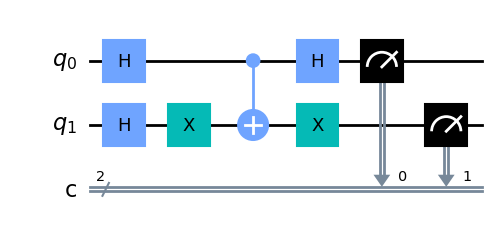

In [8]:
# Install qiskit-aer library
!pip install qiskit-aer

# Import necessary libraries
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Define the Deutsch quantum circuit
def deutsch_circuit():
    # Create a quantum circuit with two qubits and two classical bits
    qc = QuantumCircuit(2, 2)

    #Hadamard gate
    qc.h(0)
    qc.h(1)

    #quantum oracle
    qc.x(1)
    qc.cx(0, 1)
    qc.x(1)

    #Hadamard gate 
    qc.h(0)
    
    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc

# Visualize the circuit
deutsch_circuit().draw('mpl')


In [9]:
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(deutsch_circuit(), simulator)
result = execute(compiled_circuit, simulator).result()

# Display results
counts = result.get_counts()
print("Simulation Results:", counts)


MissingOptionalLibraryError: "The 'qiskit-aer' library is required to use 'Aer provider'. You can install it with 'pip install qiskit-aer'."